In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import norm, lognorm, skewnorm, expon
from tqdm.notebook import tqdm

## Below is an example of how to select a value from a normal distribution

  0%|          | 0/100000 [00:00<?, ?it/s]

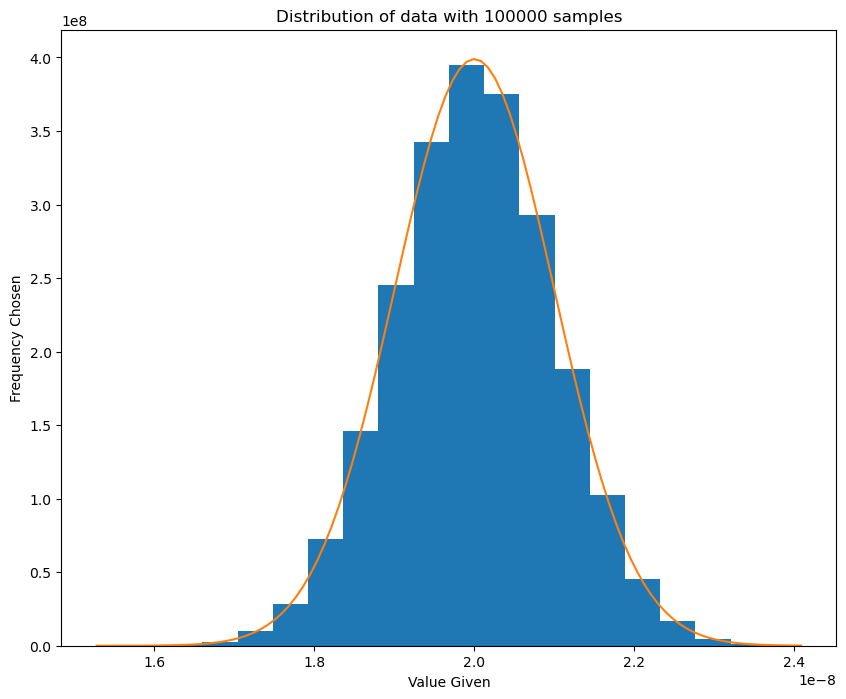

In [2]:
mean=20e-9 #mean value
std=1e-9 #standard Deviation
out = [] #makes 1000 samples from the above stats assuming a normal disturbiton
samps = 100000
for i in tqdm(range(samps)):
    out.append(np.random.normal(loc=mean,scale=std,size=None))
    
out = np.array(out)

x = np.linspace(min(out), max(out), 100) #makes the smooth distrubtion 
y = norm.pdf(x, mean, std)

plt.figure(figsize=(10,8))
plt.title(f'Distribution of data with {samps} samples')
plt.hist(out, density=True,bins=20) #plots the bins 
plt.plot(x,y) #plots the curve
plt.xlabel('Value Given')
plt.ylabel('Frequency Chosen')
plt.show()

In [3]:
def matrix_maker(cols, rows, disribution='normal',mean=1,std=1):
    if disribution == 'normal':
        out = np.zeros((cols,rows))
        for i in range(cols):
            for j in range(rows):
                out[i][j] = np.random.normal(loc=mean,scale=std,size=None)
    if disribution == 'None':
        out = np.ones((cols,rows)) * mean
        
    return out

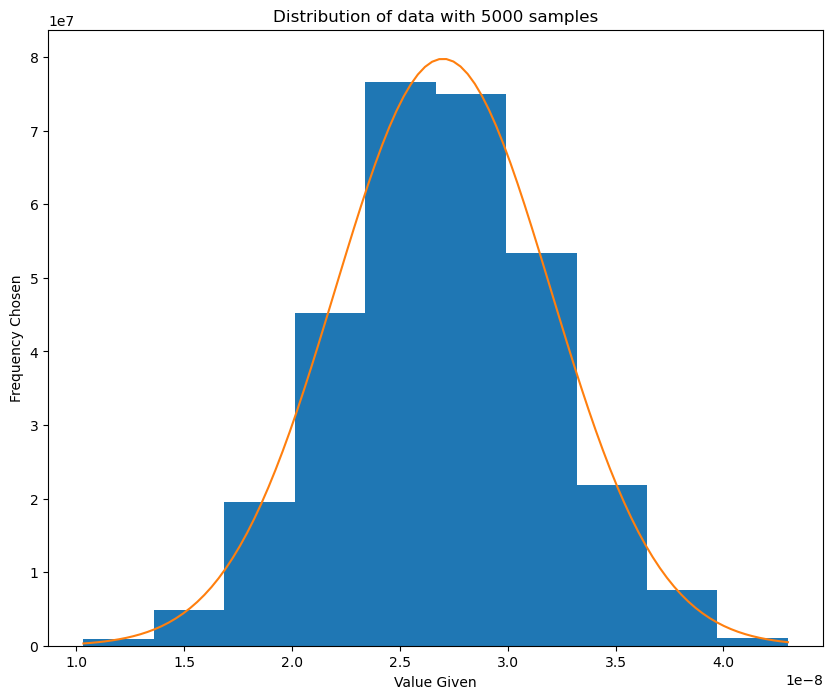

In [4]:
cols = 10
rows = 500
mean = 27e-9
std = 5e-9

test = matrix_maker(cols,rows,mean=mean,std=std)
x = np.linspace(min(test.flatten()), max(test.flatten()), 100) #makes the smooth distrubtion 
y = norm.pdf(x, mean, std)

plt.figure(figsize=(10,8))
plt.title(f'Distribution of data with {cols*rows} samples')
plt.hist(test.flatten(),density=True,)
plt.plot(x,y) #plots the curve
plt.xlabel('Value Given')
plt.ylabel('Frequency Chosen')
plt.show()




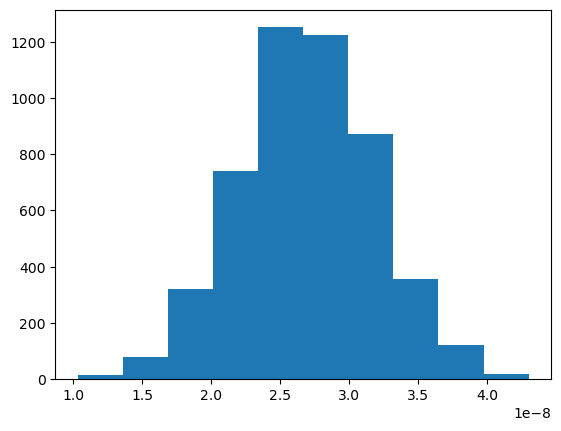

In [5]:
plt.hist(test.flatten())
plt.show()

In [6]:
Ron = 10e3
Ron_std = 1e3

Roff = 100e3
Roff_std = 10e3

Xinit = 0.1#0.1

D = 10e-9#27e-9
D_std=1e-9

muv = 1e-14

cols = 2
rows = 2

t = np.linspace(0,10,100)
f = 0.1#0.5
amp = 1e-5
I = np.sin(2*np.pi*f*t)*amp
I2 = np.sin((2*np.pi*f*t) + np.pi)*amp
I3 = np.sin((2*np.pi*f*t) - np.pi)*amp
I4 = np.sin((2*np.pi*f*t) + 2*np.pi)*amp
I_mat = np.empty((2,2,len(t)))
I_mat[0,0],I_mat[0,1],I_mat[1,0],I_mat[1,1] = I, I2, I3, I4
#print(I_mat)

In [7]:
Ron_mat = matrix_maker(cols,rows,mean=Ron,std=Ron_std)
Roff_mat = matrix_maker(cols,rows,mean=Roff,std=Roff_std)
D_mat =  matrix_maker(cols,rows,mean=D,std=D_std)

In [8]:
test = []
for i in range(len(I)):
    test.append(((Ron_mat*Xinit) + (Roff_mat*(1-Xinit)))*I[i])
test = np.array(test)
test[:,0].shape

min(test[:,0,0])

test2 = np.empty_like(I_mat)
for i in range(cols):
    for j in range(rows):
        for k in range(len(I_mat[i,j])):
            test2[i,j,k] = ((Ron_mat[i,j]*Xinit) + (Roff_mat[i,j]*(1-Xinit)))*I_mat[i,j,k]

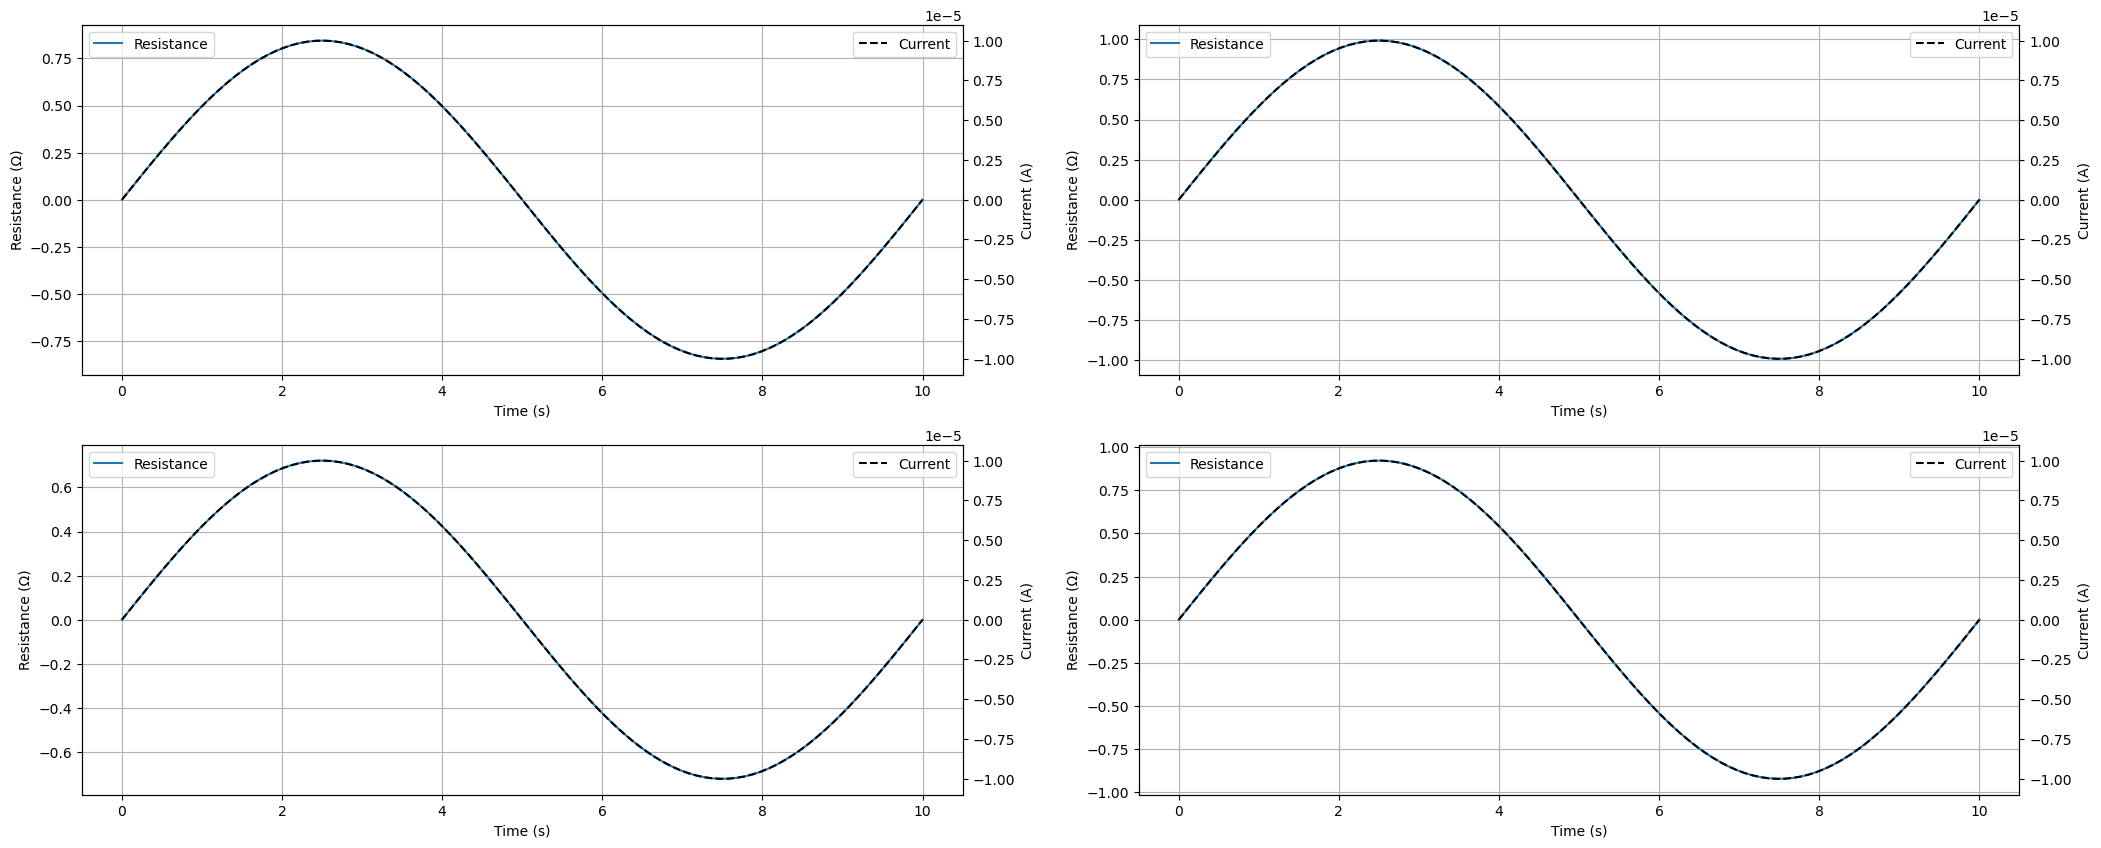

In [9]:
plt.figure(figsize=(25,10))
ax0 = plt.subplot(2,2,1)
ax1 = ax0.twinx()

ax2 = plt.subplot(2,2,2)
ax3 = ax2.twinx()

ax4 = plt.subplot(2,2,3)
ax5 = ax4.twinx()

ax6 = plt.subplot(2,2,4)
ax7 = ax6.twinx()

ax0.plot(t,test[:,0,0],label='Resistance')
ax0.legend(loc='upper left')
ax0.set_ylabel('Resistance (\u03A9)')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax1.plot(t,I,linestyle='--',color='black',label='Current')
ax1.legend()
ax1.set_ylabel('Current (A)')

ax2.plot(t,test[:,0,1],label='Resistance')
ax2.legend(loc='upper left')
ax2.set_ylabel('Resistance (\u03A9)')
ax2.set_xlabel('Time (s)')
ax2.grid()
ax3.plot(t,I,linestyle='--',color='black',label='Current')
ax3.legend()
ax3.set_ylabel('Current (A)')


ax4.plot(t,test[:,1,0],label='Resistance')
ax4.legend(loc='upper left')
ax4.set_ylabel('Resistance (\u03A9)')
ax4.set_xlabel('Time (s)')
ax4.grid()
ax5.plot(t,I,linestyle='--',color='black',label='Current')
ax5.legend()
ax5.set_ylabel('Current (A)')


ax6.plot(t,test[:,1,1],label='Resistance')
ax6.legend(loc='upper left')
ax6.set_ylabel('Resistance (\u03A9)')
ax6.set_xlabel('Time (s)')
ax6.grid()
ax7.plot(t,I,linestyle='--',color='black',label='Current')
ax7.legend()
ax7.set_ylabel('Current (A)')


plt.show()

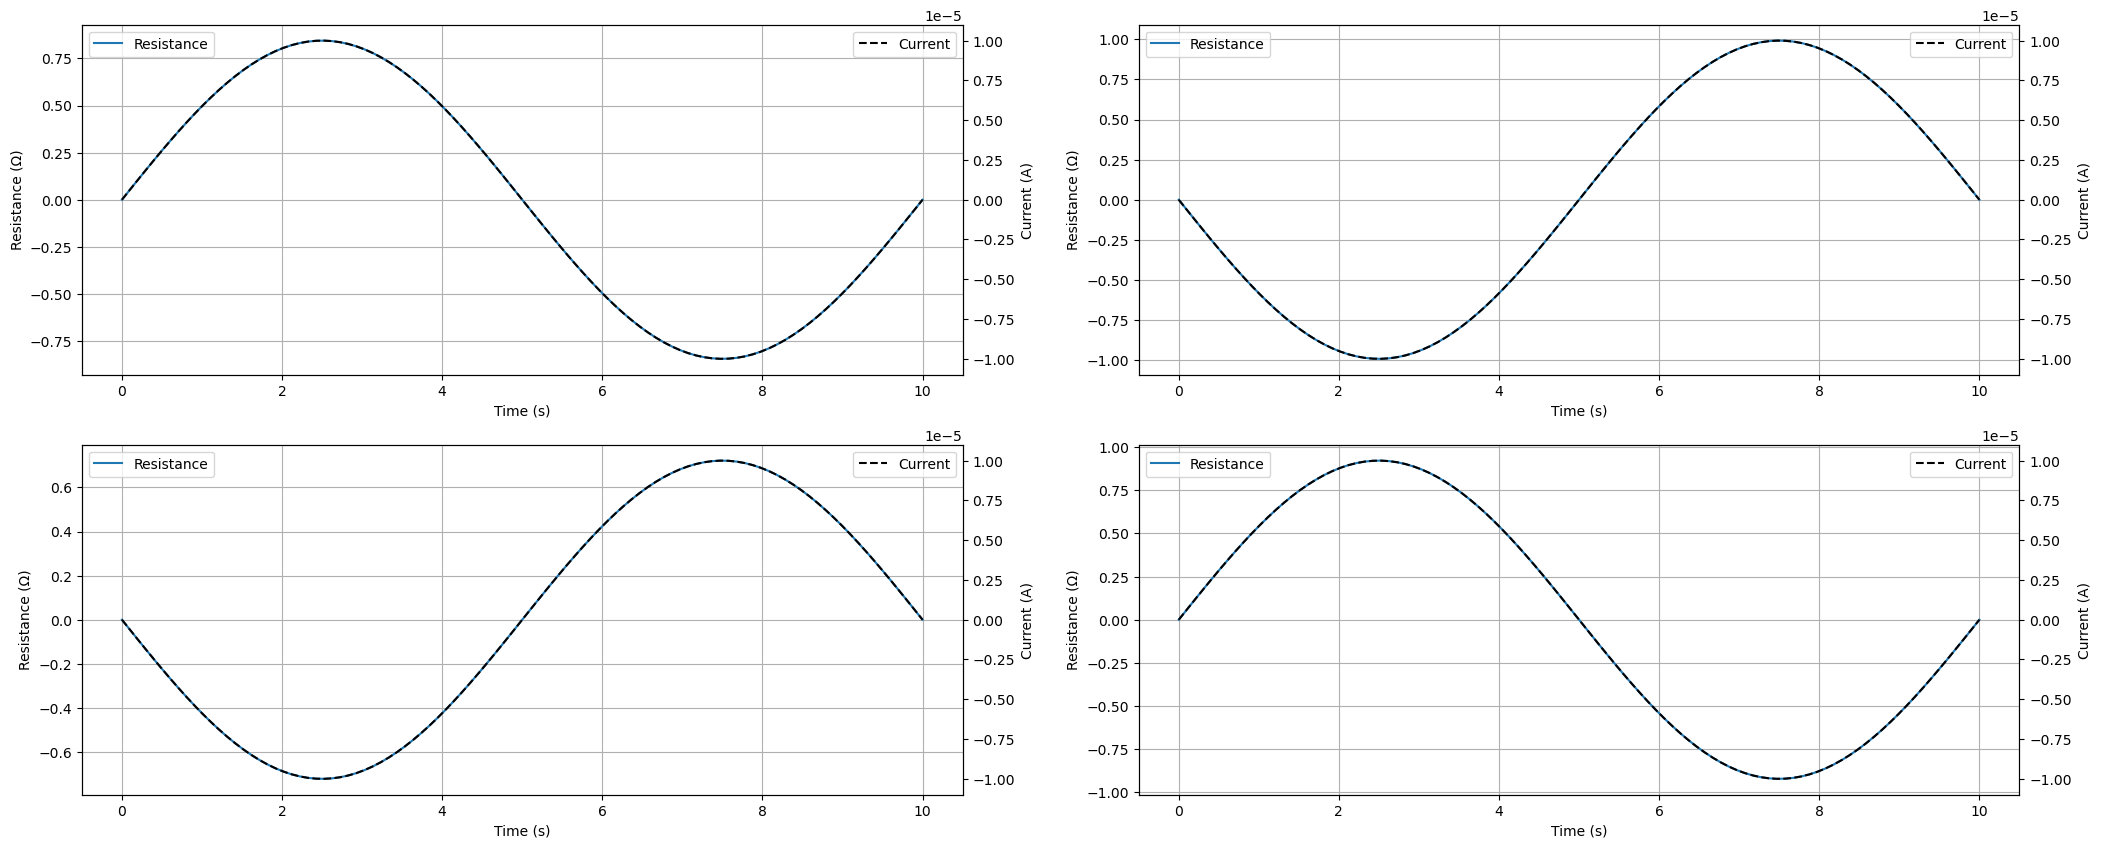

In [10]:
plt.figure(figsize=(25,10))
ax0 = plt.subplot(2,2,1)
ax1 = ax0.twinx()

ax2 = plt.subplot(2,2,2)
ax3 = ax2.twinx()

ax4 = plt.subplot(2,2,3)
ax5 = ax4.twinx()

ax6 = plt.subplot(2,2,4)
ax7 = ax6.twinx()

ax0.plot(t,test2[0,0],label='Resistance')
ax0.legend(loc='upper left')
ax0.set_ylabel('Resistance (\u03A9)')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax1.plot(t,I,linestyle='--',color='black',label='Current')
ax1.legend()
ax1.set_ylabel('Current (A)')

ax2.plot(t,test2[0,1],label='Resistance')
ax2.legend(loc='upper left')
ax2.set_ylabel('Resistance (\u03A9)')
ax2.set_xlabel('Time (s)')
ax2.grid()
ax3.plot(t,I2,linestyle='--',color='black',label='Current')
ax3.legend()
ax3.set_ylabel('Current (A)')


ax4.plot(t,test2[1,0],label='Resistance')
ax4.legend(loc='upper left')
ax4.set_ylabel('Resistance (\u03A9)')
ax4.set_xlabel('Time (s)')
ax4.grid()
ax5.plot(t,I3,linestyle='--',color='black',label='Current')
ax5.legend()
ax5.set_ylabel('Current (A)')


ax6.plot(t,test2[1,1],label='Resistance')
ax6.legend(loc='upper left')
ax6.set_ylabel('Resistance (\u03A9)')
ax6.set_xlabel('Time (s)')
ax6.grid()
ax7.plot(t,I4,linestyle='--',color='black',label='Current')
ax7.legend()
ax7.set_ylabel('Current (A)')


plt.show()


In [11]:
Ron = 10e3
Ron_std = 1e3

Roff = 100e3
Roff_std = 10e3

Xinit = 0.1#0.1

D = 10e-9#27e-9
D_std=1e-9

muv = 1e-14

cols = 2
rows = 2

t = np.linspace(0,10,100)
f = 0.1#0.5
amp = 1e-5
I = np.sin(2*np.pi*f*t)*amp

I2 = np.empty_like(t)

for i in range(len(I2)):
    if round(t[i],0)%2==0:
        I2[i] = amp
    else:
        I2[i] = -amp
I2 = np.array(I2)


I_mat = np.empty((rows,len(t)))
I_mat[0],I_mat[1] = I, I2 


Ron_mat = matrix_maker(cols,rows,mean=Ron,std=Ron_std)
Roff_mat = matrix_maker(cols,rows,mean=Roff,std=Roff_std)
D_mat =  matrix_maker(cols,rows,mean=D,std=D_std)

I_mat

test3 = np.empty_like(I_mat).transpose()
print(np.shape(test3),np.shape(I_mat))

temp = np.empty((2,2))
for k in range(len(t)):
    for i in range(cols):
        for j in range(rows):
            temp[i,j] = ((Ron_mat[i,j]*Xinit) + (Roff_mat[i,j]*(1-Xinit))) #makes the temp array this time steps values 
            dum = np.dot(I_mat[:,k],temp)
            test3[k] = dum


(100, 2) (2, 100)


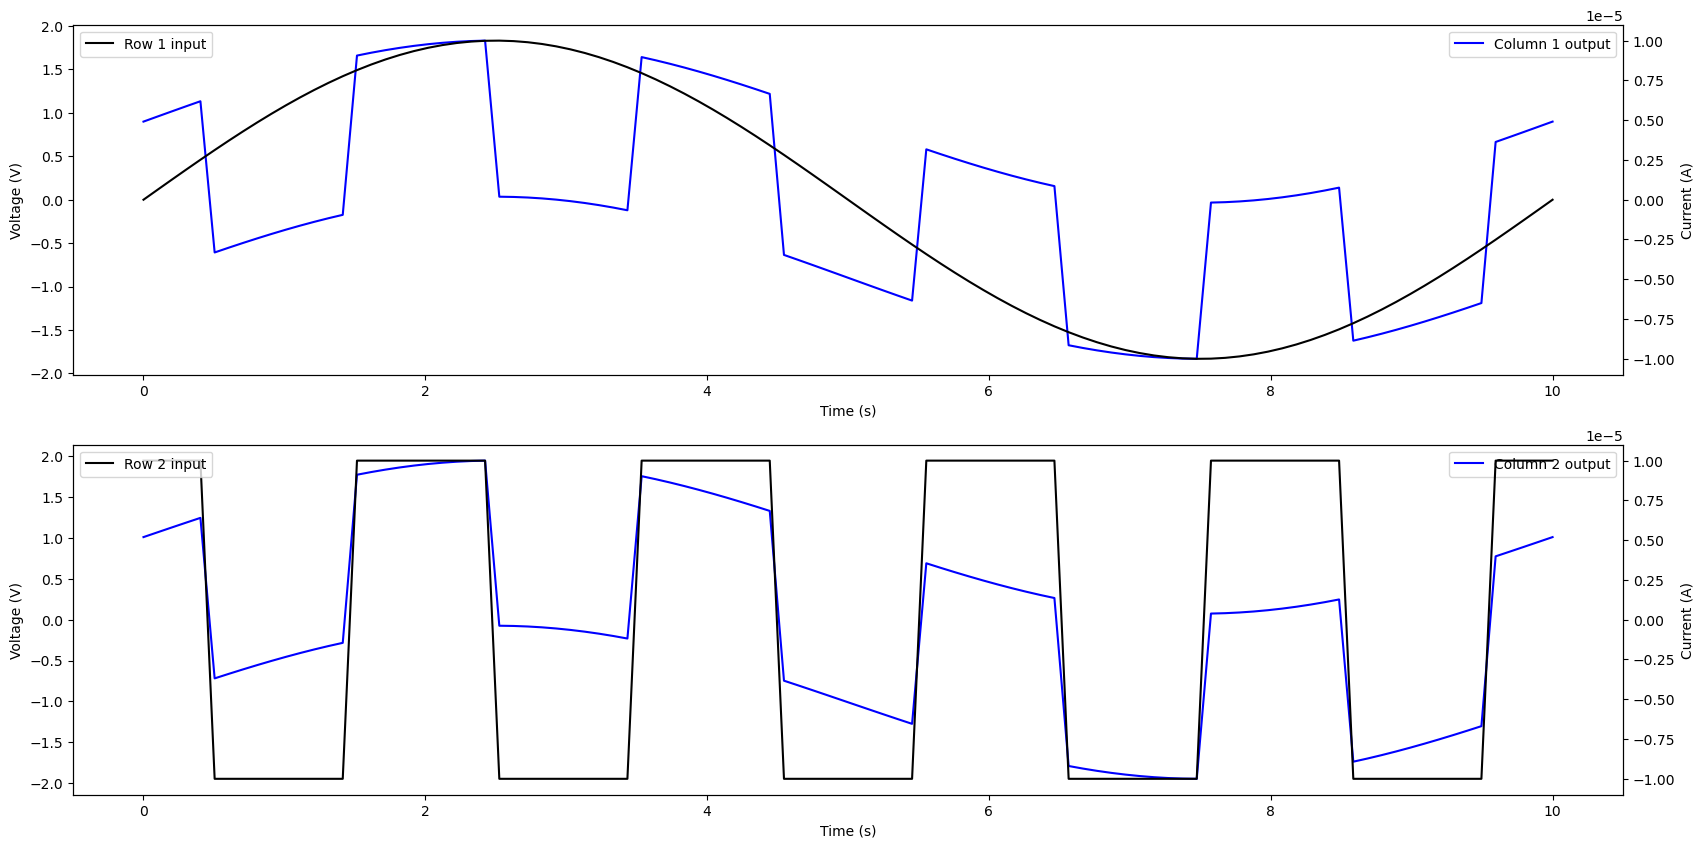

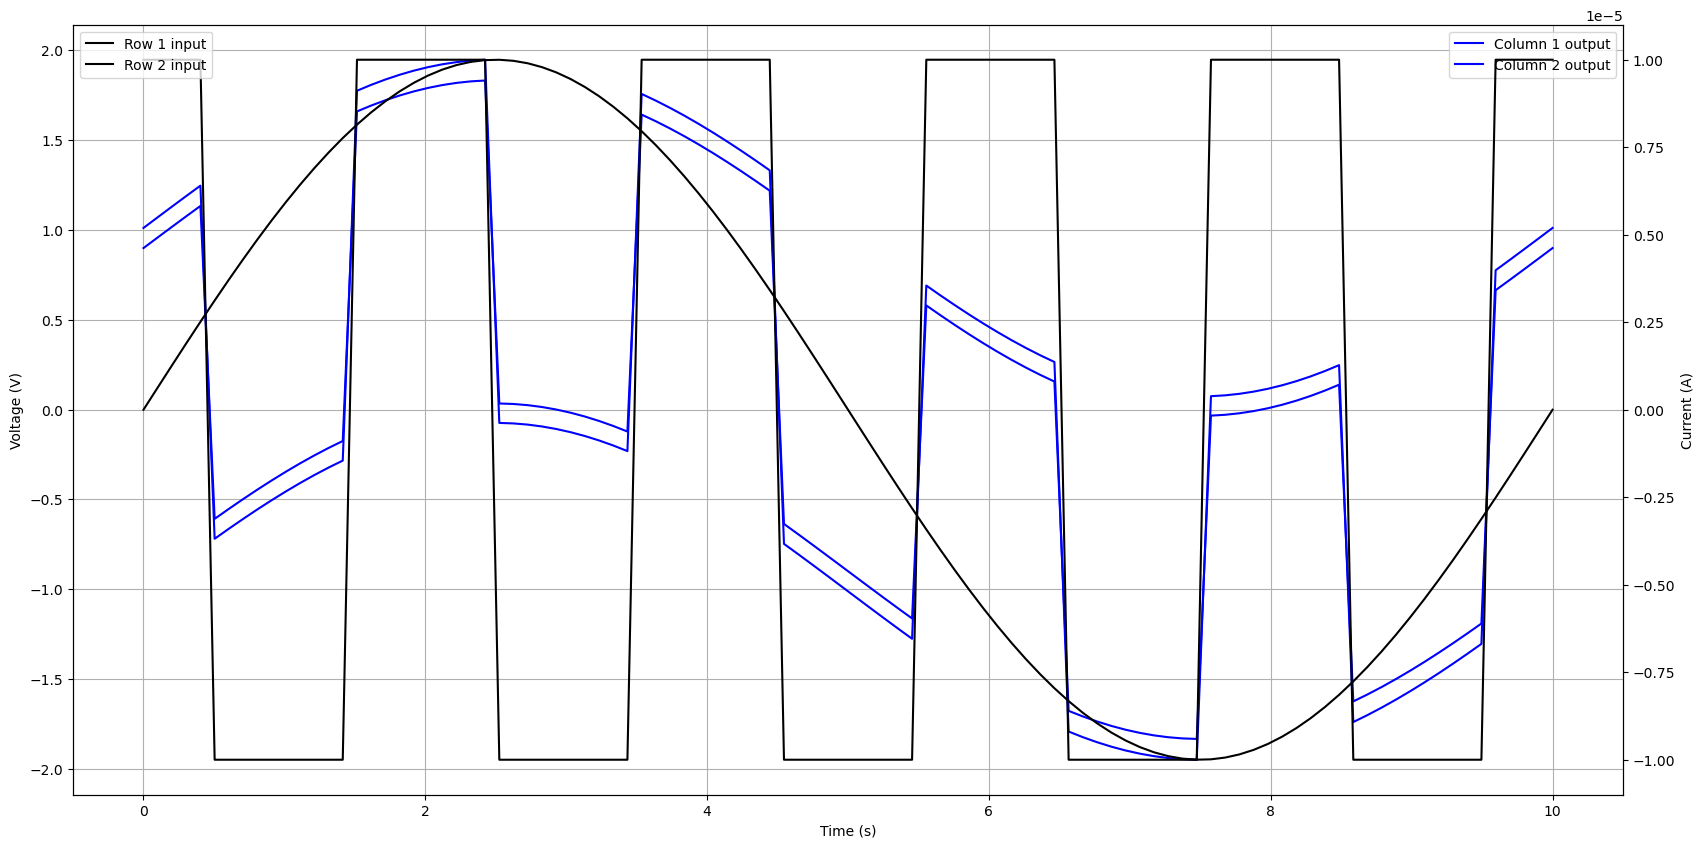

In [12]:
plt.figure(figsize=(20,10))

ax0 = plt.subplot(2,1,1)
ax1 = ax0.twinx()

ax2 = plt.subplot(2,1,2)
ax3 = ax2.twinx()

ax0.plot(t,test3[:,0],color='blue',label='Column 1 output')
ax0.legend()
ax0.set_ylabel('Voltage (V)')
ax0.set_xlabel('Time (s)')
ax1.plot(t,I_mat[0],label='Row 1 input',color='black')
ax1.legend(loc='upper left')
ax1.set_ylabel('Current (A)')

ax2.plot(t,test3[:,1],color='blue',label='Column 2 output')
ax2.legend()
ax2.set_ylabel('Voltage (V)')
ax2.set_xlabel('Time (s)')
ax3.plot(t,I_mat[1],label='Row 2 input',color='black')
ax3.legend(loc='upper left')
ax3.set_ylabel('Current (A)')
plt.show()

plt.figure(figsize=(20,10))

ax0 = plt.subplot(1,1,1)
ax1 = ax0.twinx()

ax0.plot()
ax0.plot(t,test3[:,0],color='blue',label='Column 1 output')
ax0.plot(t,test3[:,1],color='blue',label='Column 2 output')
ax0.legend()
ax0.set_ylabel('Voltage (V)')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax1.plot(t,I_mat[0],label='Row 1 input',color='black')
ax1.plot(t,I_mat[1],label='Row 2 input',color='black')
ax1.legend(loc='upper left')
ax1.set_ylabel('Current (A)')
plt.show()

In [13]:
def linear_ion_matrix(muv, Ron, Ron_std, Roff, Roff_std, D, D_std, I, t, Xinit, cols, rows):
    
    def matrix_maker(cols, rows, disribution='normal',mean=1,std=1):
        if disribution == 'normal':
            out = np.zeros((cols,rows))
            for i in range(cols):
                for j in range(rows):
                    out[i][j] = np.random.normal(loc=mean,scale=std,size=None)
        
        return out
    
    def dx_func(muv, Ron, D, I, dt):
        dum = (muv*Ron)/(D**2)
        return(dum*I*dt)
    
    Ron_mat = matrix_maker(cols,rows,mean=Ron,std=Ron_std)
    Roff_mat = matrix_maker(cols,rows,mean=Roff,std=Roff_std)
    D_mat =  matrix_maker(cols,rows,mean=D,std=D_std)
    
    out = []
    
    x = Xinit
    
    for i in range(len(I)):
        if i == 0:
            out.append(np.zeros((cols,rows)))
        else:
            dt = t[i] - t[i-1]
            v = (Ron_mat*x) + (Roff_mat*(1-x))*I[i]
            out.append(v)
    return(out)

In [14]:
def memristor(muv, Ron, Roff, D, I, t, Xinit):
    
    def dx_func(muv, Ron, D, I, dt):
        dum = (muv*Ron)/(D**2)
        return(dum*I*dt)
    
    
    out = []
    
    x = Xinit
    
    for i in range(len(I)):
        if i == 0:
            out.append(0)
        else:
            dt = t[i]-t[i-1]
            v = ((Ron*x) + (Roff*(1-x)))*I[i]
            out.append(v)
            dx = dx_func(muv, Ron, D, I[i], dt)
            x = x+dx
    return(out)


def crossbar_linear_ion(muv, Ron_mat, Roff_mat, D_mat, I_mat, t, Xinit_mat):
    
    def dx_func(muv, Ron, D, I, dt):
        dum = (muv*Ron)/(D**2)
        return(dum*I*dt)
    
    cols = np.shape(Ron_mat)[0]
    rows = np.shape(Ron_mat)[1]
    temp = np.empty((np.shape(Ron_mat)[0],np.shape(Ron_mat)[1]))
    
    out_mat = np.empty_like(I_mat).transpose()
    res = []
    X_out= []
    for k in range(len(t)): #for each time step
        if k == 0:
            out_mat[k] = np.dot(I_mat[:,k],np.zeros((np.shape(Ron_mat)[0],np.shape(Ron_mat)[1])))
            res.append(np.zeros((np.shape(Ron_mat)[0],np.shape(Ron_mat)[1])))
            X_out.append(Xinit_mat)
        else:
            for i in range(cols): #for each column
                for j in range(rows): #for each row in each column
                    temp[i,j] = ((Ron_mat[i,j]*Xinit_mat[i,j]) + (Roff_mat[i,j])*(1-Xinit_mat[i,j])) #make this time steps resistances into an array
            
            dum = np.dot(I_mat[:,k],temp) #this timesteps outputs 
            out_mat[k] = dum #this will be our output
            res.append(temp)
            X_out.append(Xinit_mat)
            

            dt = t[k]-t[k-1]     
            print(Xinit_mat)
            #update memristor weights
            for i in range(cols): #for each column
                for j in range(rows): #for each row in each column
                    dx = dx_func(muv, Ron_mat[i,j], D_mat[i,j], I_mat[j,k], dt)
                    #print(dx)
                    Xinit_mat[i,j] = Xinit_mat[i,j] + dx
    res = np.array(res)
    X_out = np.array(X_out)
    return out_mat, res, X_out



In [15]:
Ron = 10e3
Ron_std = 1e3

Roff = 100e3
Roff_std = 10e3

Xinit = 0.5#0.1
Xinit_std = 0.000001

D = 10e-9#27e-9
D_std=1e-9

muv = 1e-14

cols = 2
rows = 2

t = np.linspace(0,10,10000)
f = 0.1#0.5
amp = 1e-6
I = np.sin(2*np.pi*f*t)*amp

I2 = np.empty_like(t)

for i in range(len(I2)):
    if round(t[i],0)%2==0:
        I2[i] = amp
    else:
        I2[i] = -amp
I2 = np.array(I2)


I_mat = np.empty((rows,len(t)))
I_mat[0],I_mat[1] = I, I2 


Ron_mat = matrix_maker(cols,rows,mean=Ron,std=Ron_std)
Roff_mat = matrix_maker(cols,rows,mean=Roff,std=Roff_std)
D_mat =  matrix_maker(cols,rows,mean=D,std=D_std)
Xinit_mat = np.random.rand(rows,cols)
Xinit_mat = np.array([[0.5,0.5],[0.5,0.5]])

I_mat

x, res,pos = crossbar_linear_ion(muv, Ron_mat, Roff_mat, D_mat, I_mat, t, Xinit_mat)

[[0.5 0.5]
 [0.5 0.5]]
[[0.50000058 0.50100902]
 [0.50000083 0.50085389]]
[[0.50000173 0.50201804]
 [0.50000249 0.50170779]]
[[0.50000346 0.50302707]
 [0.50000499 0.50256168]]
[[0.50000576 0.50403609]
 [0.50000831 0.50341557]]
[[0.50000864 0.50504511]
 [0.50001246 0.50426947]]
[[0.5000121  0.50605413]
 [0.50001745 0.50512336]]
[[0.50001613 0.50706316]
 [0.50002327 0.50597726]]
[[0.50002074 0.50807218]
 [0.50002991 0.50683115]]
[[0.50002592 0.5090812 ]
 [0.50003739 0.50768504]]
[[0.50003168 0.51009022]
 [0.5000457  0.50853894]]
[[0.50003802 0.51109925]
 [0.50005484 0.50939283]]
[[0.50004493 0.51210827]
 [0.50006481 0.51024672]]
[[0.50005242 0.51311729]
 [0.50007561 0.51110062]]
[[0.50006049 0.51412631]
 [0.50008724 0.51195451]]
[[0.50006913 0.51513533]
 [0.50009971 0.5128084 ]]
[[0.50007834 0.51614436]
 [0.500113   0.5136623 ]]
[[0.50008814 0.51715338]
 [0.50012713 0.51451619]]
[[0.50009851 0.5181624 ]
 [0.50014208 0.51537008]]
[[0.50010945 0.51917142]
 [0.50015787 0.51622398]]
[[0.5001

[[1.98157419 0.97827658]
 [2.63700046 0.90474555]]
[[1.98249081 0.97726756]
 [2.63832258 0.90389166]]
[[1.98340742 0.97625853]
 [2.63964469 0.90303777]]
[[1.98432402 0.97524951]
 [2.64096678 0.90218387]]
[[1.98524062 0.97424049]
 [2.64228886 0.90132998]]
[[1.9861572  0.97323147]
 [2.64361093 0.90047609]]
[[1.98707377 0.97222244]
 [2.64493298 0.89962219]]
[[1.98799033 0.97121342]
 [2.64625501 0.8987683 ]]
[[1.98890688 0.9702044 ]
 [2.64757702 0.8979144 ]]
[[1.98982341 0.96919538]
 [2.64889902 0.89706051]]
[[1.99073994 0.96818635]
 [2.650221   0.89620662]]
[[1.99165645 0.96717733]
 [2.65154297 0.89535272]]
[[1.99257295 0.96616831]
 [2.65286491 0.89449883]]
[[1.99348943 0.96515929]
 [2.65418684 0.89364494]]
[[1.99440591 0.96415027]
 [2.65550874 0.89279104]]
[[1.99532236 0.96314124]
 [2.65683063 0.89193715]]
[[1.99623881 0.96213222]
 [2.65815249 0.89108326]]
[[1.99715524 0.9611232 ]
 [2.65947433 0.89022936]]
[[1.99807165 0.96011418]
 [2.66079616 0.88937547]]
[[1.99898805 0.95910515]
 [2.66

[[3.39492637 0.78353527]
 [4.67559853 0.73994409]]
[[3.39508769 0.78252625]
 [4.67583121 0.7390902 ]]
[[3.39524844 0.78151723]
 [4.67606307 0.73823631]]
[[3.39540862 0.7805082 ]
 [4.67629412 0.73738241]]
[[3.39556824 0.77949918]
 [4.67652434 0.73652852]]
[[3.39572728 0.77849016]
 [4.67675375 0.73567463]]
[[3.39588577 0.77748114]
 [4.67698234 0.73482073]]
[[3.39604368 0.77647211]
 [4.67721011 0.73396684]]
[[3.39620102 0.77546309]
 [4.67743707 0.73311295]]
[[3.3963578  0.77445407]
 [4.6776632  0.73225905]]
[[3.39651401 0.77344505]
 [4.67788852 0.73140516]]
[[3.39666966 0.77243603]
 [4.67811301 0.73055126]]
[[3.39682473 0.771427  ]
 [4.67833669 0.72969737]]
[[3.39697924 0.77041798]
 [4.67855955 0.72884348]]
[[3.39713318 0.76940896]
 [4.67878159 0.72798958]]
[[3.39728655 0.76839994]
 [4.67900281 0.72713569]]
[[3.39743935 0.76739091]
 [4.67922321 0.7262818 ]]
[[3.39759159 0.76638189]
 [4.67944279 0.7254279 ]]
[[3.39774325 0.76537287]
 [4.67966156 0.72457401]]
[[3.39789435 0.76436385]
 [4.67

[[2.25453415 0.32241207]
 [3.03071383 0.34971473]]
[[2.25363638 0.32140305]
 [3.0294189  0.34886084]]
[[2.25273849 0.32039403]
 [3.0281238  0.34800694]]
[[2.25184048 0.31938501]
 [3.02682853 0.34715305]]
[[2.25094236 0.31837598]
 [3.02553309 0.34629916]]
[[2.25004413 0.31736696]
 [3.02423749 0.34544526]]
[[2.24914577 0.31635794]
 [3.02294172 0.34459137]]
[[2.24824731 0.31534892]
 [3.02164578 0.34373748]]
[[2.24734873 0.31433989]
 [3.02034968 0.34288358]]
[[2.24645003 0.31333087]
 [3.01905342 0.34202969]]
[[2.24555122 0.31232185]
 [3.01775699 0.3411758 ]]
[[2.2446523  0.31131283]
 [3.0164604  0.3403219 ]]
[[2.24375327 0.3103038 ]
 [3.01516365 0.33946801]]
[[2.24285412 0.30929478]
 [3.01386674 0.33861411]]
[[2.24195486 0.30828576]
 [3.01256966 0.33776022]]
[[2.24105549 0.30727674]
 [3.01127242 0.33690633]]
[[2.24015601 0.30626772]
 [3.00997502 0.33605243]]
[[2.23925642 0.30525869]
 [3.00867746 0.33519854]]
[[2.23835672 0.30424967]
 [3.00737974 0.33434465]]
[[2.2374569  0.30324065]
 [3.00

[[0.58364503 0.03685876]
 [0.62064834 0.10806285]]
[[0.58333935 0.03584973]
 [0.62020743 0.10720896]]
[[0.58303421 0.03484071]
 [0.6197673  0.10635506]]
[[0.58272962 0.03383169]
 [0.61932796 0.10550117]]
[[0.58242556 0.03282267]
 [0.6188894  0.10464728]]
[[0.58212206 0.03181365]
 [0.61845163 0.10379338]]
[[0.58181909 0.03080462]
 [0.61801464 0.10293949]]
[[0.58151667 0.0297956 ]
 [0.61757843 0.1020856 ]]
[[0.5812148  0.02878658]
 [0.61714301 0.1012317 ]]
[[0.58091347 0.02777756]
 [0.61670838 0.10037781]]
[[0.58061268 0.02676853]
 [0.61627452 0.09952391]]
[[0.58031244 0.02575951]
 [0.61584146 0.09867002]]
[[0.58001274 0.02475049]
 [0.61540918 0.09781613]]
[[0.57971358 0.02374147]
 [0.61497768 0.09696223]]
[[0.57941497 0.02273244]
 [0.61454697 0.09610834]]
[[0.57911691 0.02172342]
 [0.61411704 0.09525445]]
[[0.57881939 0.0207144 ]
 [0.6136879  0.09440055]]
[[0.57852241 0.01970538]
 [0.61325955 0.09354666]]
[[0.57822598 0.01869636]
 [0.61283198 0.09269277]]
[[0.57793009 0.01768733]
 [0.61

In [16]:
res[:,0,1]

array([    0.        , 60775.91373951, 60775.91373951, ...,
       60775.91373951, 60775.91373951, 60775.91373951])

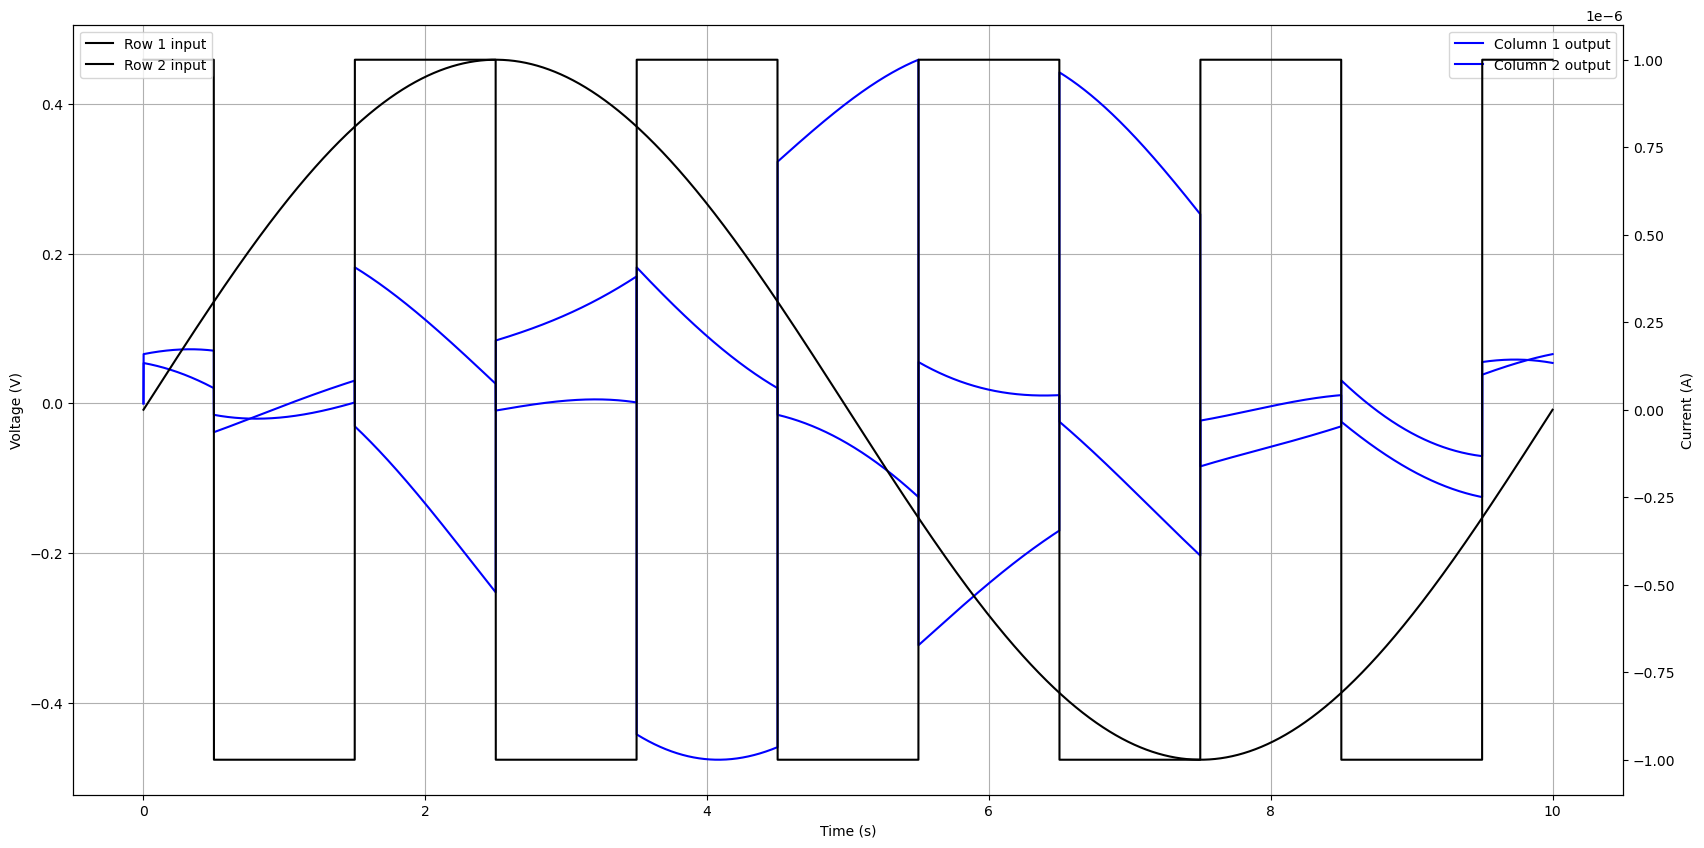

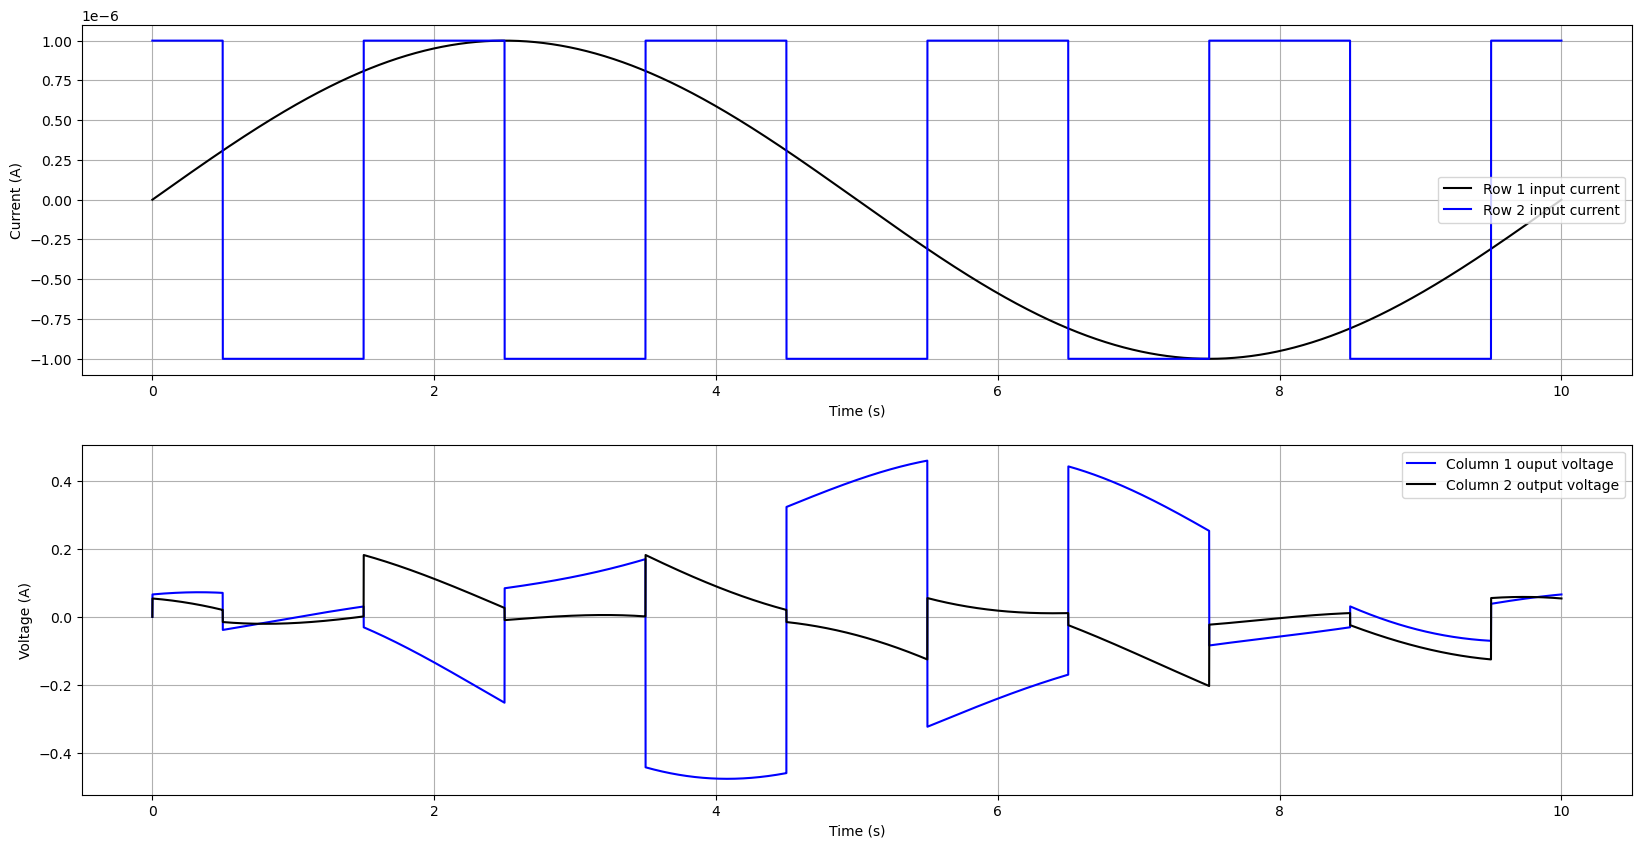

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [17]:
plt.figure(figsize=(20,10))

ax0 = plt.subplot(1,1,1)
ax1 = ax0.twinx()

ax0.plot()
ax0.plot(t,x[:,0],color='blue',label='Column 1 output')
ax0.plot(t,x[:,1],color='blue',label='Column 2 output')
ax0.legend()
ax0.set_ylabel('Voltage (V)')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax1.plot(t,I_mat[0],label='Row 1 input',color='black')
ax1.plot(t,I_mat[1],label='Row 2 input',color='black')
ax1.legend(loc='upper left')
ax1.set_ylabel('Current (A)')
plt.show()

#-------------------------------------------------------------------
plt.figure(figsize=(20,10))

ax0 = plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,2)

ax0.plot(t,I_mat[0],label='Row 1 input current',color='black')
ax0.plot(t,I_mat[1],label='Row 2 input current',color='blue')
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Current (A)')
ax0.grid()
ax0.legend()

ax1.plot(t,x[:,0],color='blue',label='Column 1 ouput voltage')
ax1.plot(t,x[:,1],color='black',label='Column 2 output voltage')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (A)')
ax1.grid()
ax1.legend()
plt.show()

#-------------------------------------------------------------------
plt.figure(figsize=(20,10))


In [18]:
print('max xpos ',max(pos.flatten()))
print('min xpos ',min(pos.flatten()))

max xpos  0.5000000000000085
min xpos  0.4989909776842355


In [19]:
for i in range(len(pos.flatten())):
    print(pos.flatten()[i])

0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000

0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064

0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999999925
0.4991461064275778
0.5000000000000085
0.4989909776842355
0.4999999999

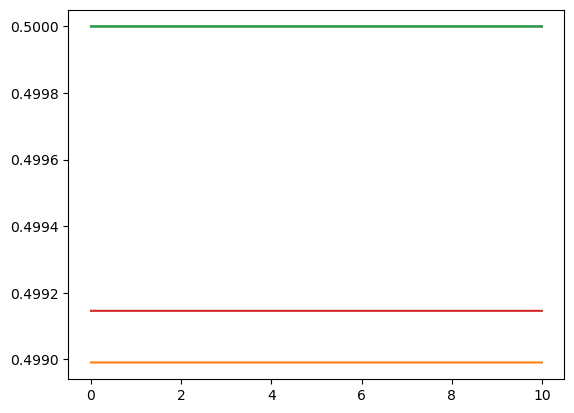

In [20]:
plt.plot(t,pos[:,0,0])
plt.plot(t,pos[:,0,1])
plt.plot(t,pos[:,1,0])
plt.plot(t,pos[:,1,1])

In [21]:
max(pos.flatten())

0.5000000000000085

In [22]:
def crossbar_linear_ion(muv, Ron_mat, Roff_mat, D_mat, I_mat, t, Xinit_mat):
    
    def johleker(x,p):
        return(1-(((2*x)-1)**(2*p)))
    
    def dx_func(muv, Ron, D, I, dt):
        dum = (muv*Ron)/(D**2)
        return(dum*I*dt)
    
    cols = np.shape(Ron_mat)[0] #finds the number of columns to go through 
    rows = np.shape(Ron_mat)[1] #finds the number of rows to go through  
    
    out_mat = np.empty_like(I_mat).transpose()
    res = []
    X_out= Xinit_mat
    for k in range(len(t)):
        if k == 0:
            dt = 0
        else:
            dt = t[k] - t[k-1]
            
        res_mat = np.empty((cols,rows))
           
        for i in range(cols):
            for j in range(rows):
                res_mat[i,j] = ( (Ron_mat[i,j]*Xinit_mat[i,j]) + (Roff_mat[i,j] * (1-Xinit_mat[i,j])) )
        
        X_out=np.append(X_out,Xinit_mat)
        out_mat[k] = np.dot(I_mat[:,k],res_mat)
        res.append(res_mat)
        
        
        for i in range(cols):
            for j in range(rows):
                dx = dx_func(muv, Ron_mat[i,j], D_mat[i,j], I_mat[j,k],dt) 
                dx = dx * johleker(Xinit_mat[i,j],1)
                Xinit_mat[i,j] = Xinit_mat[i,j] + dx
        
    res = np.array(res)

    #print(X_out)
    return out_mat, res, X_out

In [23]:
Ron = 10e3
Ron_std = 1e3

Roff = 100e3
Roff_std = 10e3

Xinit = 0.5#0.1
Xinit_std = 0.000001

D = 10e-9#27e-9
D_std=1e-9

muv = 1e-14

cols = 2
rows = 2

t = np.linspace(0,10,10000)
f = 0.1#0.5
amp = 1e-6
I = np.sin(2*np.pi*f*t)*amp

I2 = np.empty_like(t)

for i in range(len(I2)):
    if round(t[i],0)%2==0:
        I2[i] = amp
    else:
        I2[i] = -amp
I2 = np.array(I2)


I_mat = np.empty((rows,len(t)))
I_mat[0],I_mat[1] = I, I2 


Ron_mat = matrix_maker(cols,rows,mean=Ron,std=Ron_std)
Roff_mat = matrix_maker(cols,rows,mean=Roff,std=Roff_std)
D_mat =  matrix_maker(cols,rows,mean=D,std=D_std)
Xinit_mat = np.random.rand(rows,cols)
#Xinit_mat = np.array([[0.5,0.5],[0.5,0.5]])

I_mat

x, res,pos = crossbar_linear_ion(muv, Ron_mat, Roff_mat, D_mat, I_mat, t, Xinit_mat)


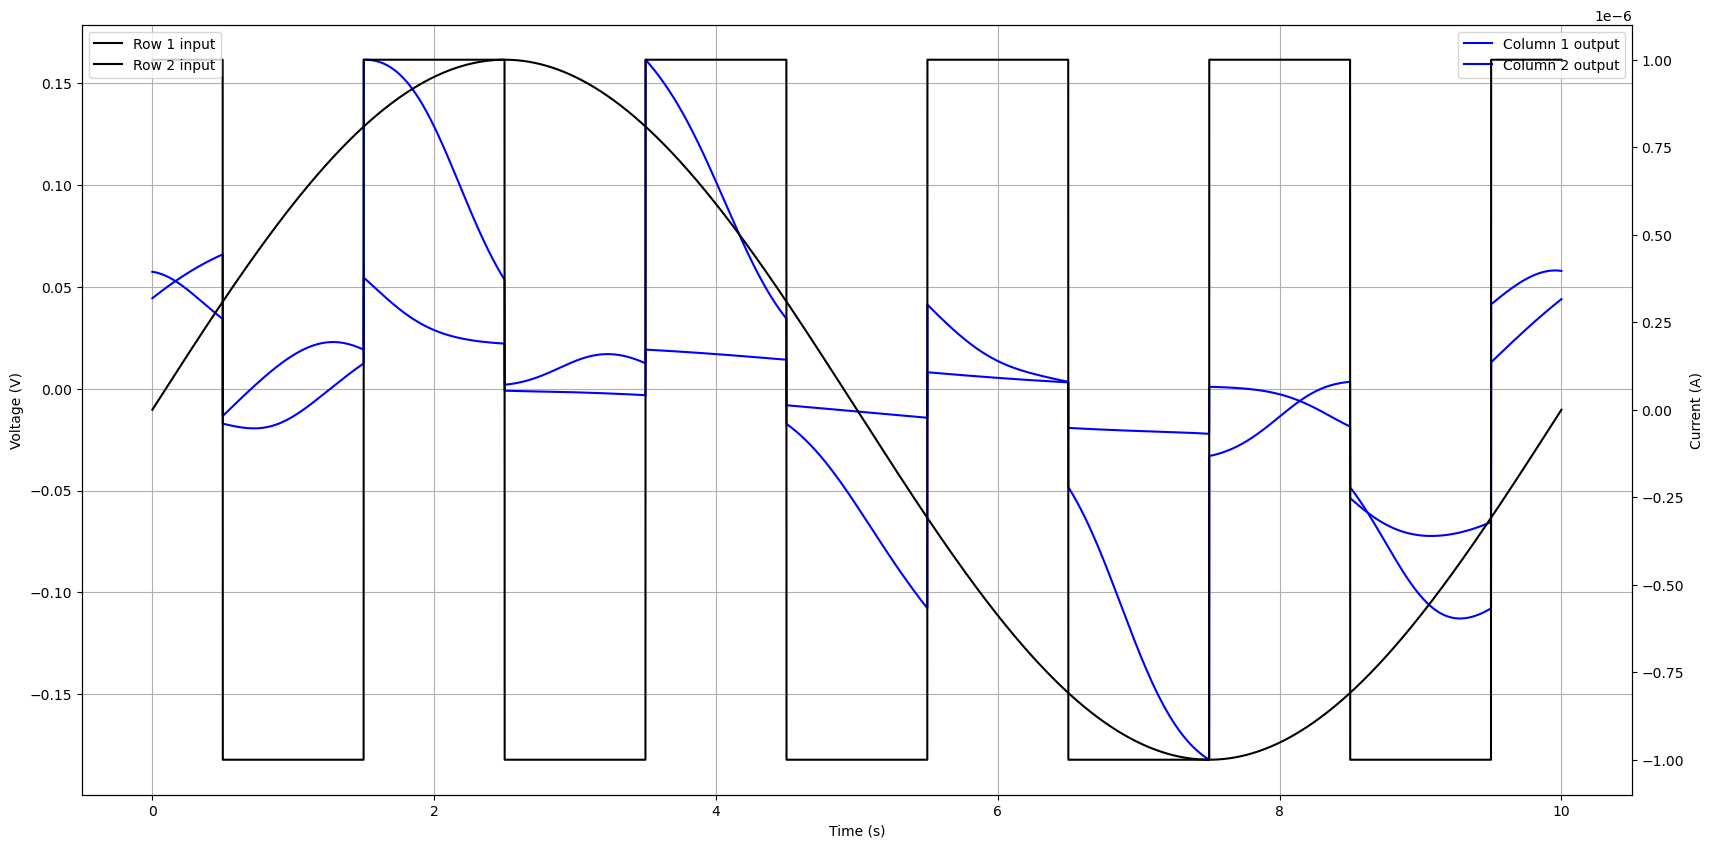

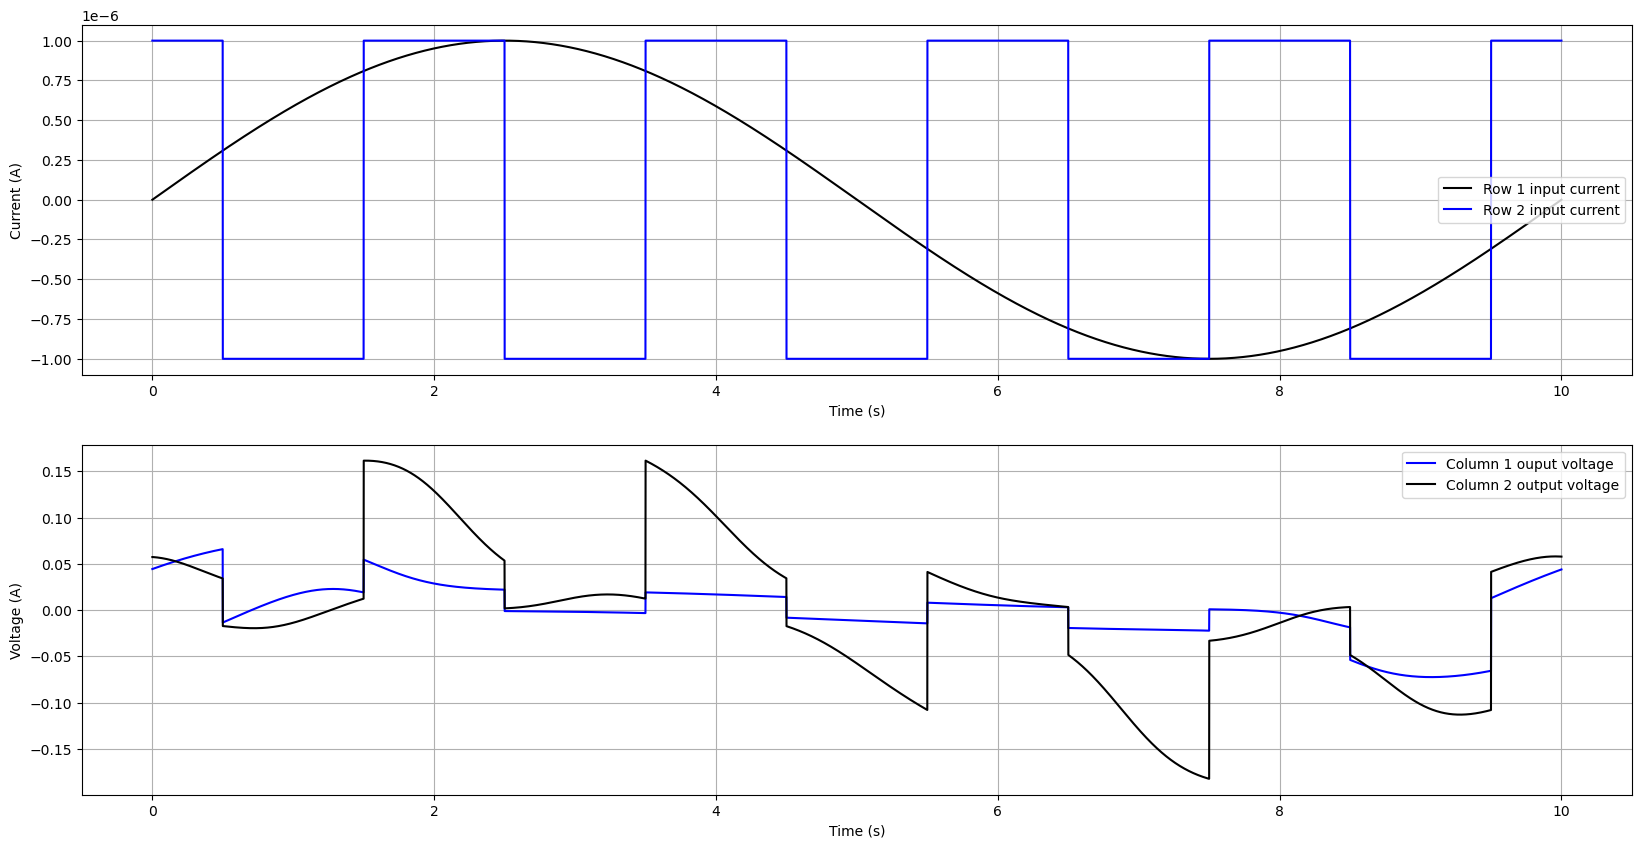

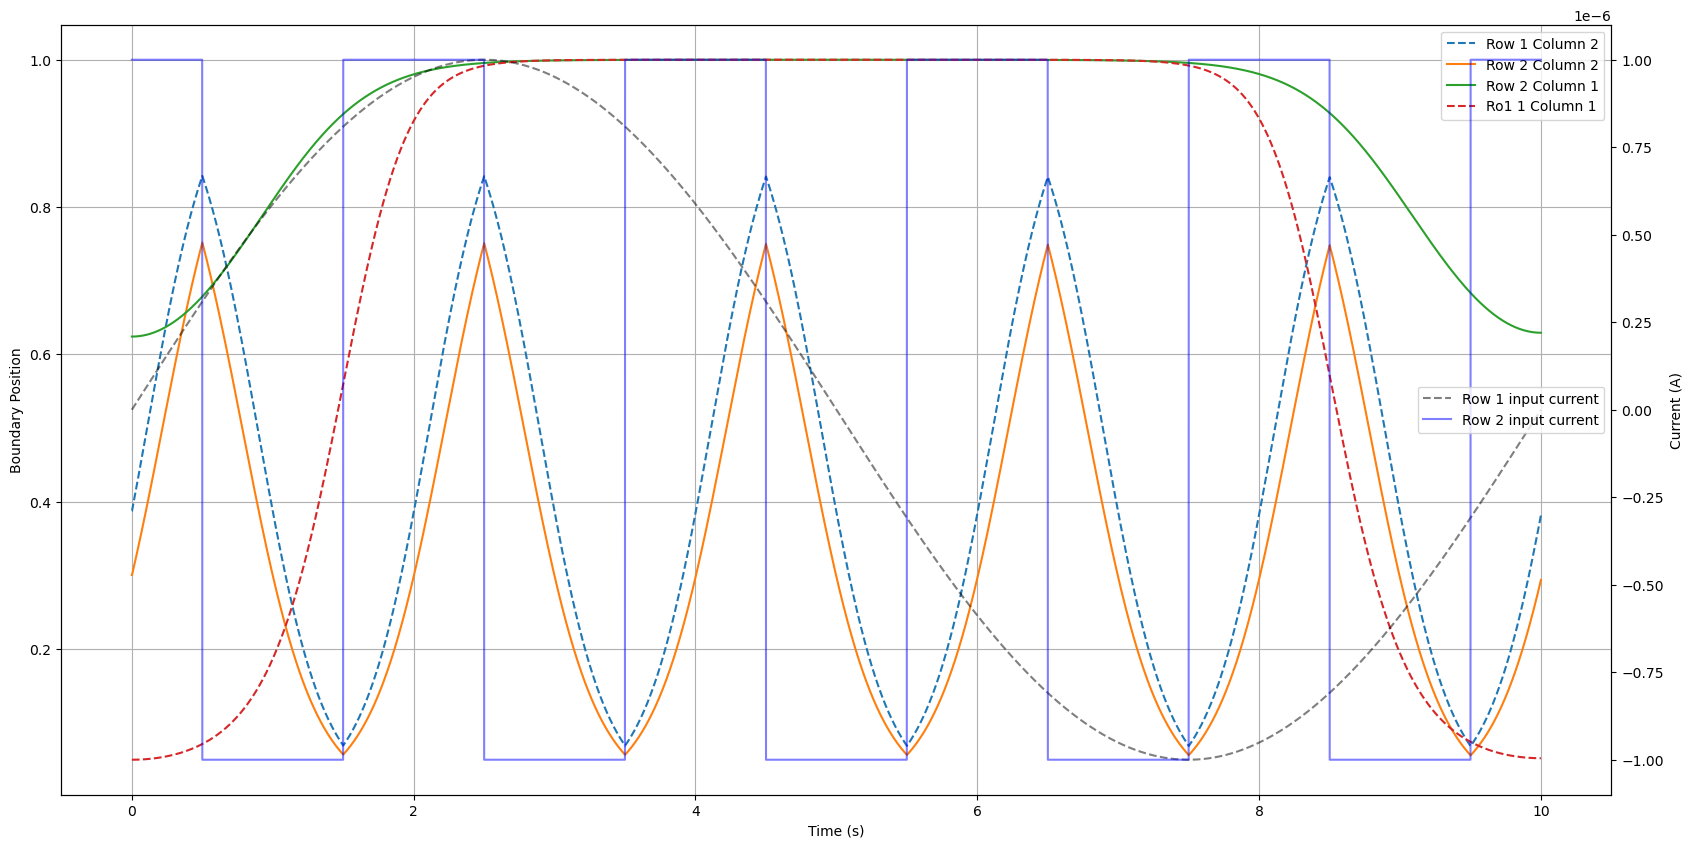

In [24]:
plt.figure(figsize=(20,10))

ax0 = plt.subplot(1,1,1)
ax1 = ax0.twinx()

ax0.plot()
ax0.plot(t,x[:,0],color='blue',label='Column 1 output')
ax0.plot(t,x[:,1],color='blue',label='Column 2 output')
ax0.legend()
ax0.set_ylabel('Voltage (V)')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax1.plot(t,I_mat[0],label='Row 1 input',color='black')
ax1.plot(t,I_mat[1],label='Row 2 input',color='black')
ax1.legend(loc='upper left')
ax1.set_ylabel('Current (A)')
plt.show()

#-------------------------------------------------------------------
plt.figure(figsize=(20,10))

ax0 = plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,2)

ax0.plot(t,I_mat[0],label='Row 1 input current',color='black')
ax0.plot(t,I_mat[1],label='Row 2 input current',color='blue')
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Current (A)')
ax0.grid()
ax0.legend()

ax1.plot(t,x[:,0],color='blue',label='Column 1 ouput voltage')
ax1.plot(t,x[:,1],color='black',label='Column 2 output voltage')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (A)')
ax1.grid()
ax1.legend()
plt.show()

#-------------------------------------------------------------------
plt.figure(figsize=(20,10))
ax0 = plt.subplot(111)
ax1= ax0.twinx()

x_pos = pos[4:].reshape(len(t),cols,rows)
ax0.plot(t,x_pos[:,0,1],label='Row 1 Column 2',linestyle = '--')
ax0.plot(t,x_pos[:,1,1],label='Row 2 Column 2')
ax0.plot(t,x_pos[:,1,0],label='Row 2 Column 1')
ax0.plot(t,x_pos[:,0,0],label='Ro1 1 Column 1',linestyle = '--')
ax0.set_ylabel('Boundary Position')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax0.legend()

ax1.plot(t,I_mat[0],label='Row 1 input current',color='black',alpha = 0.5, linestyle = '--')
ax1.plot(t,I_mat[1],label='Row 2 input current',color='blue',alpha = 0.5, linestyle = 'solid')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Current (A)')
ax1.legend()

plt.show()

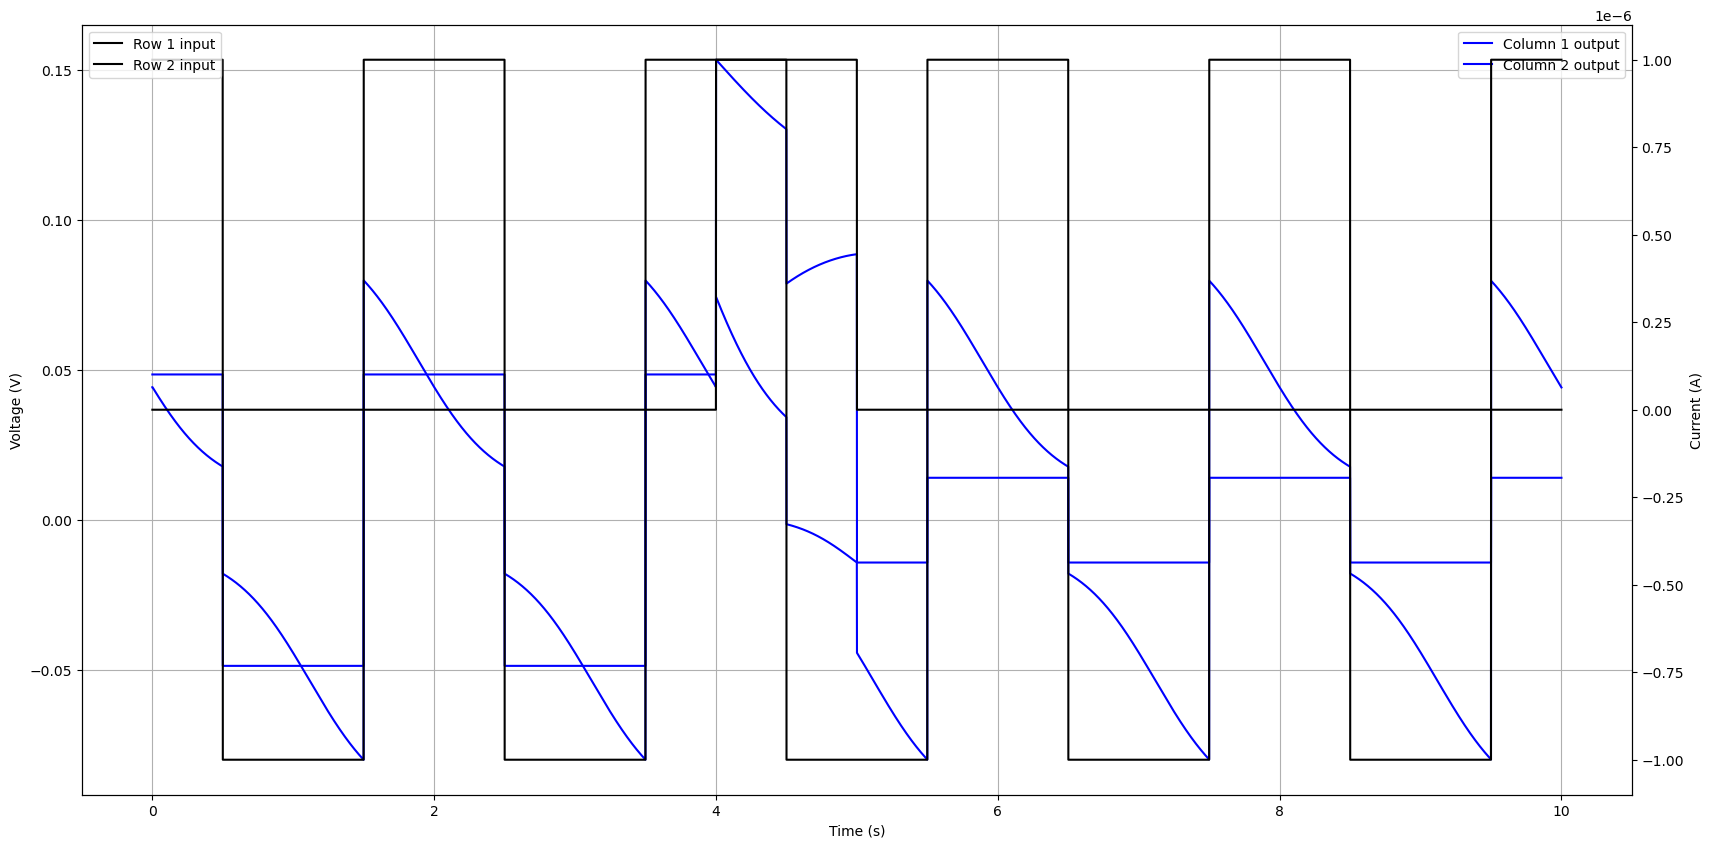

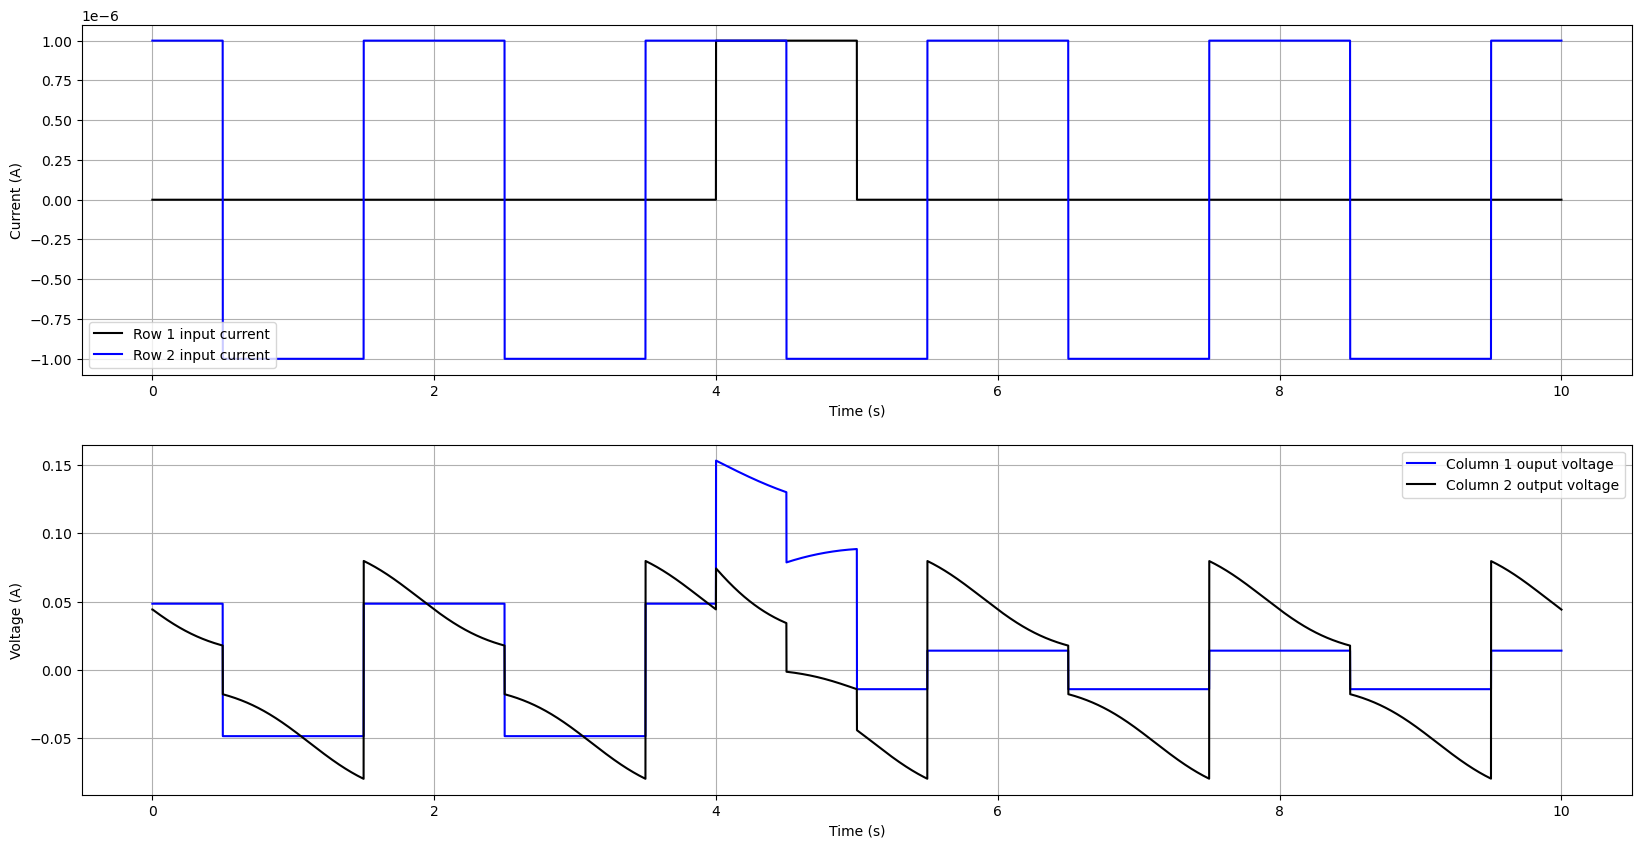

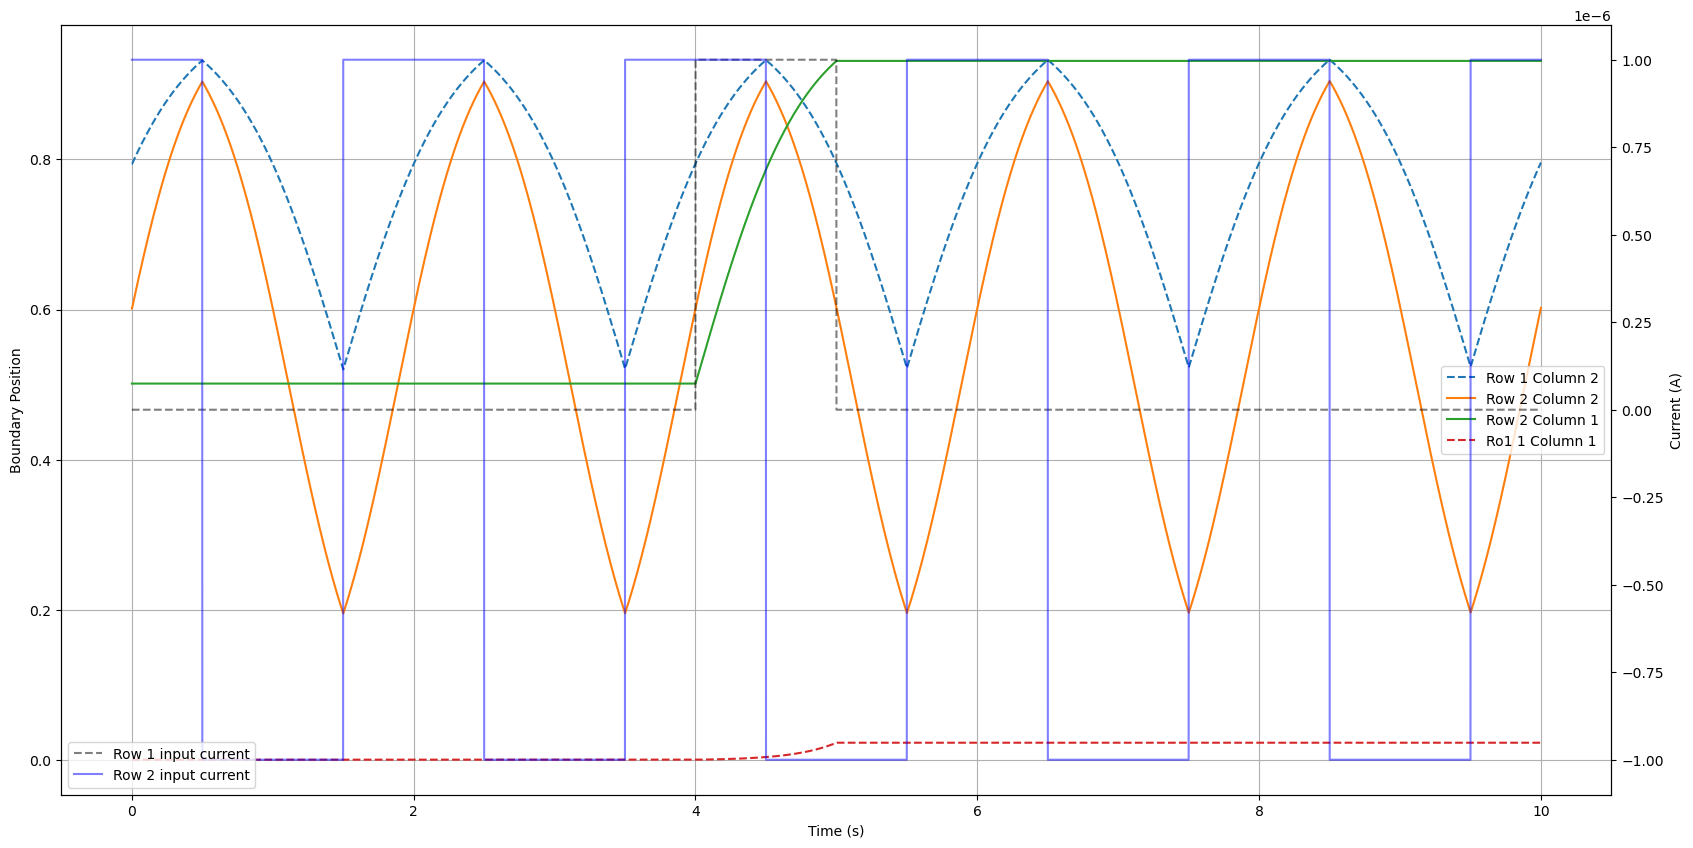

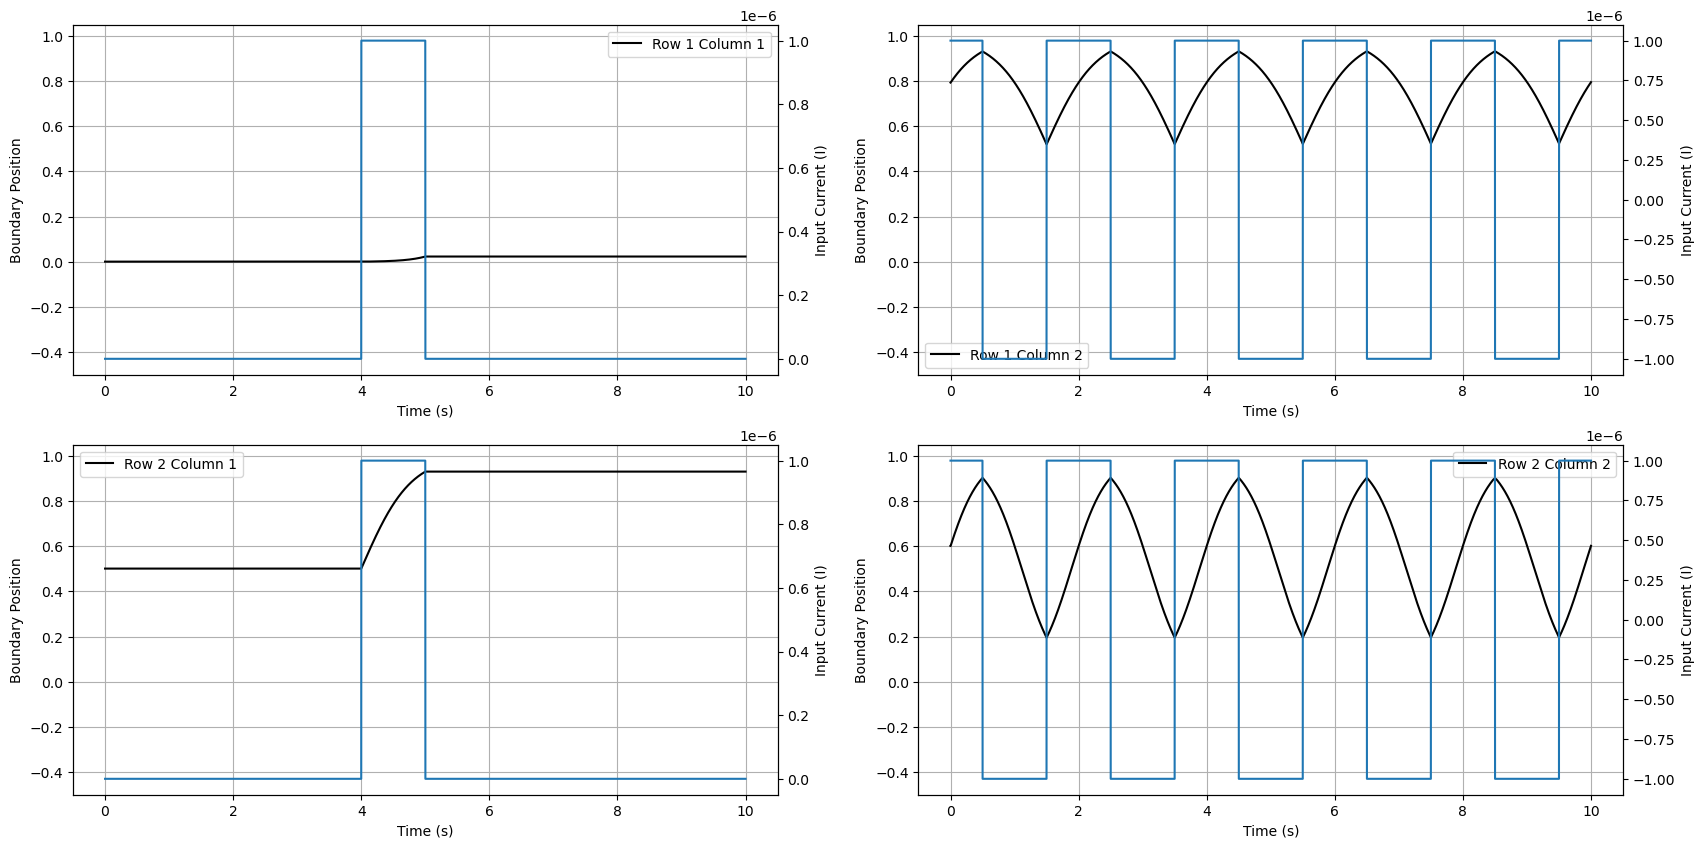

In [25]:
Ron = 10e3
Ron_std = 1e3

Roff = 100e3
Roff_std = 10e3

Xinit = 0.5#0.1
Xinit_std = 0.000001

D = 10e-9#27e-9
D_std=1e-9

muv = 1e-14

cols = 2
rows = 2

t = np.linspace(0,10,10000)
f = 0.1#0.5
amp = 1e-6
I = np.sin(2*np.pi*f*t)*amp

I2 = np.empty_like(t)

for i in range(len(I2)):
    if round(t[i],0)%2==0:
        I2[i] = amp
    else:
        I2[i] = -amp
I2 = np.array(I2)

I = np.zeros_like(t)
for i in range(len(I)):
    if 4<t[i]<=5:
        I[i] = amp
    else:
        I[i] = 0

I_mat = np.empty((rows,len(t)))
I_mat[0],I_mat[1] = I, I2 


Ron_mat = matrix_maker(cols,rows,mean=Ron,std=Ron_std)
Roff_mat = matrix_maker(cols,rows,mean=Roff,std=Roff_std)
D_mat =  matrix_maker(cols,rows,mean=D,std=D_std)
Xinit_mat = np.random.rand(rows,cols)
#Xinit_mat = np.array([[0.5,0.5],[0.5,0.5]])

I_mat

x, res,pos = crossbar_linear_ion(muv, Ron_mat, Roff_mat, D_mat, I_mat, t, Xinit_mat)

plt.figure(figsize=(20,10))

ax0 = plt.subplot(1,1,1)
ax1 = ax0.twinx()

ax0.plot()
ax0.plot(t,x[:,0],color='blue',label='Column 1 output')
ax0.plot(t,x[:,1],color='blue',label='Column 2 output')
ax0.legend()
ax0.set_ylabel('Voltage (V)')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax1.plot(t,I_mat[0],label='Row 1 input',color='black')
ax1.plot(t,I_mat[1],label='Row 2 input',color='black')
ax1.legend(loc='upper left')
ax1.set_ylabel('Current (A)')
plt.show()

#-------------------------------------------------------------------
plt.figure(figsize=(20,10))

ax0 = plt.subplot(2,1,1)
ax1 = plt.subplot(2,1,2)

ax0.plot(t,I_mat[0],label='Row 1 input current',color='black')
ax0.plot(t,I_mat[1],label='Row 2 input current',color='blue')
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Current (A)')
ax0.grid()
ax0.legend()

ax1.plot(t,x[:,0],color='blue',label='Column 1 ouput voltage')
ax1.plot(t,x[:,1],color='black',label='Column 2 output voltage')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (A)')
ax1.grid()
ax1.legend()
plt.show()

#-------------------------------------------------------------------
plt.figure(figsize=(20,10))
ax0 = plt.subplot(111)
ax1= ax0.twinx()

x_pos = pos[4:].reshape(len(t),cols,rows)
ax0.plot(t,x_pos[:,0,1],label='Row 1 Column 2',linestyle = '--')
ax0.plot(t,x_pos[:,1,1],label='Row 2 Column 2')
ax0.plot(t,x_pos[:,1,0],label='Row 2 Column 1')
ax0.plot(t,x_pos[:,0,0],label='Ro1 1 Column 1',linestyle = '--')
ax0.set_ylabel('Boundary Position')
ax0.set_xlabel('Time (s)')
ax0.grid()
ax0.legend()

ax1.plot(t,I_mat[0],label='Row 1 input current',color='black',alpha = 0.5, linestyle = '--')
ax1.plot(t,I_mat[1],label='Row 2 input current',color='blue',alpha = 0.5, linestyle = 'solid')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Current (A)')
ax1.legend()

plt.show()

#-------------------------------------------------------------------
plt.figure(figsize=(20,10))
ax0 = plt.subplot(2,2,1)
ax1 = ax0.twinx()
ax2 = plt.subplot(2,2,2)
ax3 = ax2.twinx()
ax4 = plt.subplot(2,2,3)
ax5 = ax4.twinx()
ax6 = plt.subplot(2,2,4)
ax7 = ax6.twinx()

ax0.plot(t,x_pos[:,0,0],label='Row 1 Column 1',color='Black')
ax0.set_ylabel('Boundary Position')
ax0.set_xlabel('Time (s)')
ax0.set_ylim(-0.5,1.05)
ax0.grid()
ax0.legend()
ax1.plot(t,I_mat[0])
ax1.set_ylabel('Input Current (I)')

ax2.plot(t,x_pos[:,0,1],label='Row 1 Column 2',color='Black')
ax2.set_ylabel('Boundary Position')
ax2.set_xlabel('Time (s)')
ax2.set_ylim(-0.5,1.05)
ax2.grid()
ax2.legend()
ax3.plot(t,I_mat[1])
ax3.set_ylabel('Input Current (I)')

ax4.plot(t,x_pos[:,1,0],label='Row 2 Column 1',color='Black')
ax4.set_ylabel('Boundary Position')
ax4.set_xlabel('Time (s)')
ax4.set_ylim(-0.5,1.05)
ax4.grid()
ax4.legend()
ax5.plot(t,I_mat[0])
ax5.set_ylabel('Input Current (I)')

ax6.plot(t,x_pos[:,1,1],label='Row 2 Column 2',color='Black')
ax6.set_ylabel('Boundary Position')
ax6.set_xlabel('Time (s)')
ax6.set_ylim(-0.5,1.05)
ax6.grid()
ax6.legend()
ax7.plot(t,I_mat[1])
ax7.set_ylabel('Input Current (I)')
plt.show()

In [26]:
len(I_mat[0])

10000

In [27]:
x[:,0]

array([0.04852351, 0.04852351, 0.04852351, ..., 0.01411224, 0.01411224,
       0.01411224])

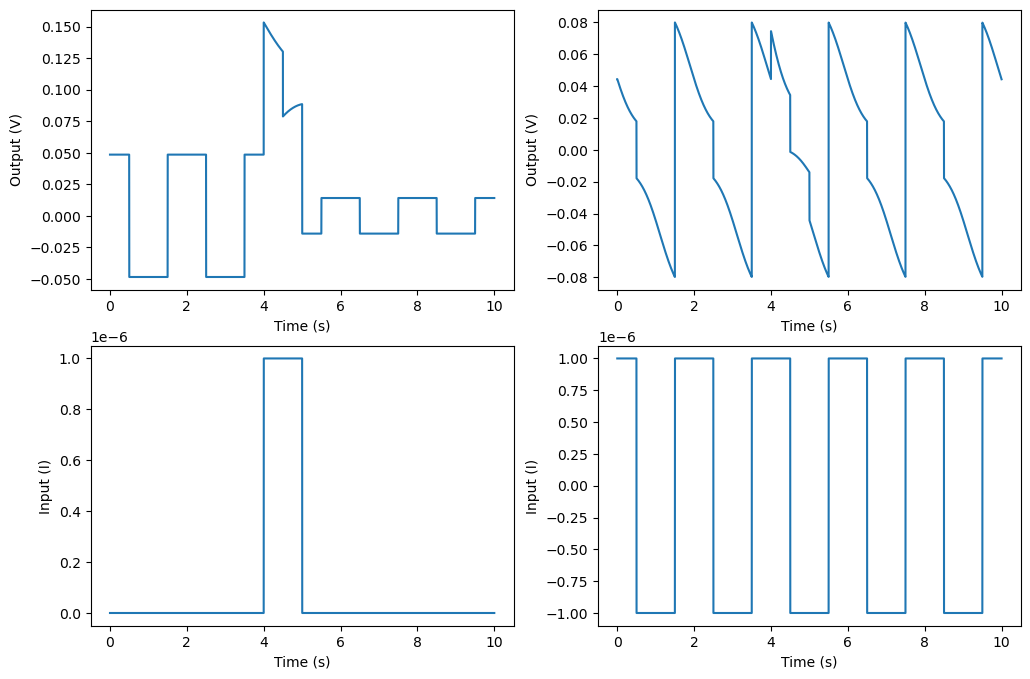

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(t,x[:,0])
plt.xlabel('Time (s)')
plt.ylabel('Output (V)')
plt.subplot(2,2,2)
plt.plot(t,x[:,1])
plt.xlabel('Time (s)')
plt.ylabel('Output (V)')
plt.subplot(2,2,3)
plt.plot(t,I_mat[0])
plt.xlabel('Time (s)')
plt.ylabel('Input (I)')
plt.subplot(2,2,4)
plt.plot(t,I_mat[1])
plt.xlabel('Time (s)')
plt.ylabel('Input (I)')
plt.show()